In [101]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
ms_df=pd.merge(mouse_metadata_df,study_results_df, on="Mouse ID")

# Display the data table for preview
ms_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Check the number of mice.
print("There are",ms_df["Mouse ID"].count(),"mice records in dataset.")
print("There are",ms_df["Mouse ID"].agg(pd.Series.nunique), "unique mice in dataset")

There are 1893 mice records in dataset.
There are 249 unique mice in dataset


In [3]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
dup_ms_df = ms_df[ms_df.duplicated(['Mouse ID', 'Timepoint'])]
print("Duplicate Rows based on Mouse ID and Timepoint are:", dup_ms_df, sep='\n')

Duplicate Rows based on Mouse ID and Timepoint are:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [4]:
# Drop any duplicate rows
unique_ms_df=ms_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
unique_ms_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Recheck the number of mice
print("There are:",len(unique_ms_df),"records of unique Mouse ID and Timepoint.\n")

There are: 1888 records of unique Mouse ID and Timepoint.



## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.
drugs=unique_ms_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})
drugs

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

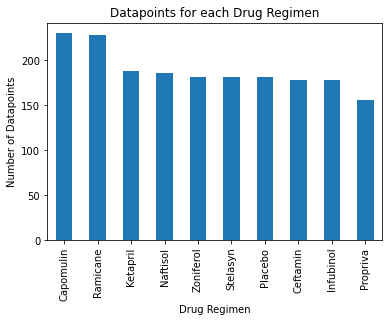

In [38]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen
drug_dp_df=unique_ms_df["Drug Regimen"].value_counts()
bar_chart=drug_dp_df.plot(kind='bar')
bar_chart.set_title("Datapoints for each Drug Regimen")
bar_chart.set_xlabel("Drug Regimen")
bar_chart.set_ylabel("Number of Datapoints")
plt.show()

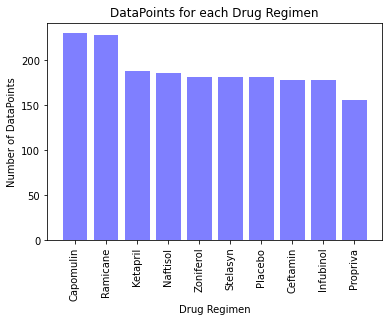

In [143]:
# General identical bar plot using pyplot instead of pandas.
datapoints=drug_dp_df
regimen=np.arange(len(datapoints))
plt.bar(regimen,datapoints,color='blue',alpha=0.5,align='center')
tick_locations=[value for value in regimen]
plt.xticks(tick_locations,datapoints.index, rotation='vertical')
plt.title("DataPoints for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of DataPoints")
plt.show()


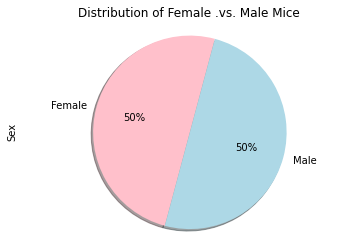

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_count=unique_ms_df.groupby(['Sex']).nunique()
gender_count.plot(kind="pie",y='Sex',startangle=75, autopct="%1.0f%%", legend=False, shadow=True,colors=["pink","lightblue"])
plt.title("Distribution of Female .vs. Male Mice")
plt.axis("equal")
plt.show()


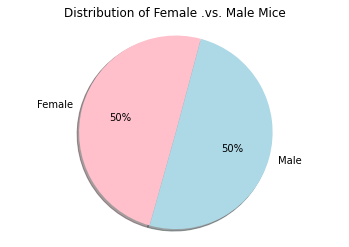

In [10]:
# Generate identical pie plot using pyplot
Sex=["Female","Male"]
Count=gender_count["Mouse ID"]
Colors=["pink","lightblue"]
plt.pie(Count,labels=Sex,colors=Colors,autopct="%1.0f%%",shadow=True,startangle=75)
plt.title("Distribution of Female .vs. Male Mice")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [122]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Create clean dataset which contains 3 columns Mouse ID, Drug Regiment, and Timepoint.
max_tp_df=unique_ms_df[["Mouse ID","Drug Regimen","Timepoint"]]

#Create reg_df based on only the mice which were on the 4 Drugs below.
regimen=['Capomulin','Ceftamin','Infubinol','Ramicane']
reg_df=max_tp_df.loc[
        (max_tp_df["Drug Regimen"]==regimen[0]) |
        (max_tp_df["Drug Regimen"]==regimen[1]) |
        (max_tp_df["Drug Regimen"]==regimen[2]) |
        (max_tp_df["Drug Regimen"]==regimen[3])
    ,:]

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse
# Create a groupby DataFrame based on Mouse ID and Drug Regimen pulling out the max value of timepoint for each mouse.
final_df=reg_df.groupby(["Mouse ID","Drug Regimen"]).max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#Create merge_df which will contain all of the mice with only the last greatest timepoint with the rest of the data for that mouse.
final_mousetvol_df=pd.merge(unique_ms_df,final_df,on=["Mouse ID","Timepoint"])
final_mousetvol_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [144]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# One method to do this is the following, but you can use whatever method works for you.

##############################################################################
# Put treatments into a list for for loop (and later for plot labels)
regimen=['Capomulin','Ceftamin','Infubinol','Ramicane']
#regimens_df=unique_ms_df["Drug Regimen"]
#regimens_df=regimens_df.drop_duplicates()

# Create empty list to fill with tumor vol data (for plotting)
drugs=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# This section of code loops through the 4 drug regimens creates a dataframe and performs calculations.
for drug in regimen:
    drug_df=final_mousetvol_df.loc[final_mousetvol_df["Drug Regimen"]==drug,:]
    quartiles=drug_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq=quartiles[0.25]
    upperq=quartiles[0.75]
    irq=upperq-lowerq
    lower_bound=lowerq-(1.5*irq)
    upper_bound=upperq+(1.5*irq)
    print(f"{drug} :")
    print(f"     Median Quartile: {quartiles[0.5]}")
    print(f"     Quartile: {irq}")
    print(f"     Lower quartile: {lowerq}")
    print(f"     Upper quartile: {upperq}")
    print(f"     Lower bound: {lower_bound}")
    print(f"     Upper bound: {upper_bound}")
    outliers = drug_df.loc[(drug_df["Tumor Volume (mm3)"] < lower_bound) | (drug_df["Tumor Volume (mm3)"] > upper_bound)]
    if (len(outliers)>0):
        print(str(len(outliers)) + " outlier/s found:\n")
        mouse=outliers["Mouse ID"].to_string(index=False)
        tvol=outliers["Tumor Volume (mm3)"].to_string(index=False)
        print(f" Mouse ID: {mouse}  Tumor Volume: {tvol}")
    else:
        print("No outliers detected.")
    print("\n")
    print("------------------------------------------\n")
    # Locate the rows which contain mice on each drug and get the tumor volumes         
Capomulin=final_mousetvol_df.loc[final_mousetvol_df["Drug Regimen"]=="Capomulin",:]
Ceftamin=final_mousetvol_df.loc[final_mousetvol_df["Drug Regimen"]=="Ceftamin",:]
Infubinol=final_mousetvol_df.loc[final_mousetvol_df["Drug Regimen"]=="Infubinol",:]
Ramicane=final_mousetvol_df.loc[final_mousetvol_df["Drug Regimen"]=="Ramicane",:]    
    
    # add subset 
drugs=[Capomulin["Tumor Volume (mm3)"],Ceftamin["Tumor Volume (mm3)"],Infubinol["Tumor Volume (mm3)"],Ramicane["Tumor Volume (mm3)"]]   
    
    # Determine outliers using upper and lower bounds
# Determined in the above loop

Capomulin :
     Median Quartile: 38.125164399999996
     Quartile: 7.781863460000004
     Lower quartile: 32.37735684
     Upper quartile: 40.1592203
     Lower bound: 20.70456164999999
     Upper bound: 51.83201549
No outliers detected.


------------------------------------------

Ceftamin :
     Median Quartile: 59.85195552
     Quartile: 15.577752179999997
     Lower quartile: 48.72207785
     Upper quartile: 64.29983003
     Lower bound: 25.355449580000002
     Upper bound: 87.66645829999999
No outliers detected.


------------------------------------------

Infubinol :
     Median Quartile: 60.16518046
     Quartile: 11.477135160000003
     Lower quartile: 54.04860769
     Upper quartile: 65.52574285
     Lower bound: 36.83290494999999
     Upper bound: 82.74144559000001
1 outlier/s found:

 Mouse ID:  c326  Tumor Volume:  36.321346


------------------------------------------

Ramicane :
     Median Quartile: 36.56165229
     Quartile: 9.098536719999998
     Lower quartile: 31.

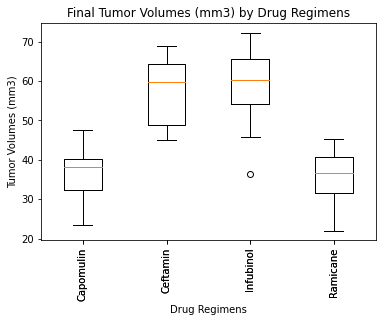

In [108]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.
regimen=('Capomulin','Ceftamin','Infubinol','Ramicane')
# x is used in plt.xticks for the four boxplots. Could have used np.arange() for this as well.
x=[1,2,3,4]
fig1, ax = plt.subplots()
ax.set_title('Final Tumor Volumes (mm3) by Drug Regimens')
ax.set_xlabel('Drug Regimens')
ax.set_ylabel('Tumor Volumes (mm3)')
plt.xticks(x,regimen,rotation='vertical')
ax.boxplot(drugs,labels=regimen)
plt.show()


## Line and Scatter Plots

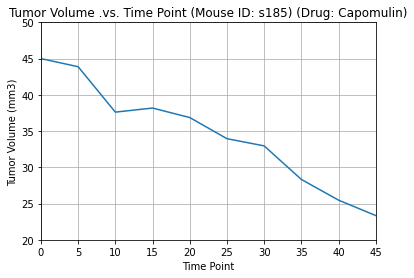

In [66]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin
mouse='s185'
drug='Capomulin'
mouse_df=unique_ms_df.loc[
        (unique_ms_df["Mouse ID"]==mouse) &
        (unique_ms_df["Drug Regimen"]==drug) 
        ,:]
plt.plot(mouse_df["Timepoint"],mouse_df["Tumor Volume (mm3)"])
plt.title("Tumor Volume .vs. Time Point (Mouse ID: " + mouse +") (Drug: " + drug + ")")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(0,45)
plt.ylim(20,50)
plt.grid()
plt.show()

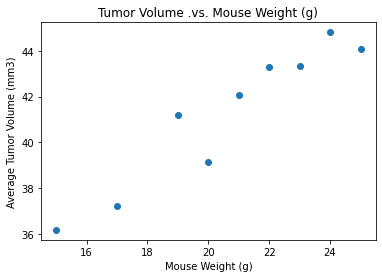

In [98]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen
mouse_df=unique_ms_df.loc[
    unique_ms_df["Drug Regimen"]==drug 
        ,:]
avg_tvbyms=mouse_df.groupby(['Weight (g)']).mean()
x_values=avg_tvbyms.index
y_values=avg_tvbyms["Tumor Volume (mm3)"]
plt.scatter(x_values,y_values)
plt.title("Tumor Volume .vs. Mouse Weight (g)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

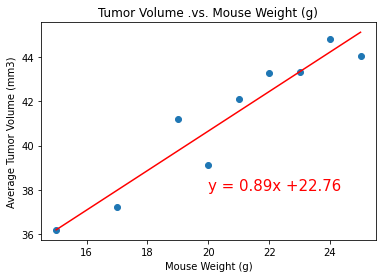

In [106]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = "+str(round(slope,2))+"x +"+str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color='red')
plt.title("Tumor Volume .vs. Mouse Weight (g)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


Observations and Insights

In processing the datasets in the Pymaceuticals drug study on 249 mice, my oberservations and insights are:

1) The data set had some duplicates whch needed to be dropped.  If used, the distribution of male to female would be skewed.

2) Removing the duplicates, shows an even distribution between males (50%) to females (50%) as shown on the pie charts.

3) In running the summary of statistics, I noticed that the stats to be lowest in the Capomulin and Ramincane than all the        other drug regimens.  Looking further, I noticed that the Capomulin and Ramincane had the most datapoints which shows that
   more mice using these two drugs survived over the timepoints recorded.  
   
4) Propriva was the least sucessful drug in the study.

5) The other drug regimens all pretty much had the same result as eachother in that group.

6) As far as outliers are concerned, Infubinol was the only one which contained an outlier.
                    Mouse ID: c326     Tumor Volume: 36.321346
                    
7) The above data is reinforced by the boxplot graph showing, Infubinol with the lower outlier.

8) In the line graph mouse s185 shows the sucess of Capomulin where the Tumor Volume decreased over the Timepoints.

9) There is a correlation between Tumor Volume and Mouse Weight.  The scatter plot shows that the greater the tumor volume
   was, the greater the weight of the mice.
   
10) One can say as the tumor sizes decreased, so did the weight of the mice.

11) Conclusion:
    Capomulin and Ramicane are the two drugs which had the most success over the all the other drug regimens used in this
    study.